In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import copy
import plotly.express as px
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  
stop_words= stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
netflix_data = pd.read_csv("/content/netflix_titles.csv")
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...



Task To Perform


1.   **EDA**
2.   **Understanding what content is available in different countries**

3.   **Priority To Movies and Tv Shows over the time**
4.  **Identifying similar content by matching text-based features**






## **EDA**

In [ ]:
print("Different columns :\n",netflix_data.columns)

Different columns :
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
netflix_data["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
netflixDistribution = pd.DataFrame(netflix_data["type"].value_counts())
netflixDistribution.reset_index(inplace=True)

In [ ]:
netflixDistribution

,index,type
0,Movie,5377
1,TV Show,2410


In [ ]:
netflixDistribution = pd.DataFrame(netflix_data["type"].value_counts())
netflixDistribution.reset_index(inplace=True)
print(netflixDistribution)
print("\n")
fig = px.pie(netflixDistribution, 'index', 'type',title ='Content type distribution in Netflix')
fig.update_traces(
                marker = dict(colors = ['#19D3F3', '#FF6692'], line = dict(color = 'white', width = 4)))
# fig.update_layout(legend_title=dict(text='type'))
fig.show()

     index  type
0    Movie  5377
1  TV Show  2410




In [ ]:
print("Check For NA Values :\n\n")
netflix_data.isna().sum()

Check For NA Values :




show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_data["date_added"].unique()

array(['August 14, 2020', 'December 23, 2016', 'December 20, 2018', ...,
       'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [ ]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_data_all = netflix_data.copy()

In [ ]:
netflix_data.drop(["show_id",'director', 'cast'],axis = 1, inplace= True)
netflix_data

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
netflix_data.isna().sum()

type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
netflix_data["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
####----------Replace with the highest value counts-------####

netflix_data["rating"] = netflix_data["rating"].replace(np.nan,"TV-MA")
netflix_data.isna().sum()

type              0
title             0
country         507
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
netflix_data["country"].value_counts()

United States                                   2555
India                                            923
United Kingdom                                   397
Japan                                            226
South Korea                                      183
                                                ... 
United States, United Kingdom, Canada, Japan       1
Mexico, Netherlands                                1
Taiwan, China                                      1
France, Algeria                                    1
United States, Colombia                            1
Name: country, Length: 681, dtype: int64

In [ ]:
netflix_data["country"] = netflix_data["country"].replace(np.nan,"United States")
netflix_data["country"].value_counts()

United States                                   3062
India                                            923
United Kingdom                                   397
Japan                                            226
South Korea                                      183
                                                ... 
United States, United Kingdom, Canada, Japan       1
Mexico, Netherlands                                1
Taiwan, China                                      1
France, Algeria                                    1
United States, Colombia                            1
Name: country, Length: 681, dtype: int64

In [ ]:
netflix_data.isna().sum().sum()

10

In [ ]:
print("Unnique Listed Movies : ",netflix_data["listed_in"].unique())

Unnique Listed Movies :  ['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas'
 'International TV Shows, TV Dramas, TV Mysteries'
 'Horror Movies, International Movies, Thrillers' 'Dramas, Thrillers'
 'Crime TV Shows, International TV Shows, TV Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Documentaries, International Movies, Sports Movies'
 'Independent Movies, Sci-Fi & Fantasy, Thrillers'
 'Dramas, International Movies, Thrillers'
 'International TV Shows, TV Dramas'
 'Comedies, Dramas, Independent Movies' 'Sports Movies'
 'Dramas, Independent Movies, International Movies'
 'Action & Adventure, Dramas, International Movies'
 'Anime Series, International TV Shows' 'Documentaries' 'Reality TV'
 'Documentaries, International Movies' 'TV Comedies'
 'Dramas, International Movies, Romantic Movies' 'Comedies'
 'Comedies, Romantic Mo

### **Content in Different Countries**

In [ ]:
print("Top 10 Genres :\n")
print(netflix_data["listed_in"].value_counts()[:10])

Top 10 Genres :

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64


In [ ]:
netflix_documentary = netflix_data[netflix_data["listed_in"] == "Documentaries"]
netflix_documentary = netflix_documentary[["title","country","description"]].reset_index(drop = True)
netflix_documentary

,title,country,description
0,(T)ERROR,United States,This real-life look at FBI counterterrorism op...
1,100 Years: One Woman's Fight for Justice,United States,This documentary chronicles Elouise Cobell's l...
2,13TH,United States,"In this thought-provoking documentary, scholar..."
3,14 Minutes from Earth,United States,A Google executive boldly attempts a death-def...
4,27: Gone Too Soon,United Kingdom,Explore the circumstances surrounding the trag...
...,...,...,...
329,Why Knot,"Canada, India, Thailand, United States, United...","Pressured by his traditional family to marry, ..."
330,Why We Fight: The Battle of Russia,United States,This installment of Frank Capra's acclaimed do...
331,Without Gorky,United Kingdom,A filmmaker trains the camera on her own famil...
332,WWII: Report from the Aleutians,United States,Filmmaker John Huston narrates this Oscar-nomi...


In [ ]:
netflix_standup = netflix_data[netflix_data["listed_in"] == "Stand-Up Comedy"]
netflix_standup = netflix_standup[["title","country","description"]].reset_index(drop = True)
netflix_standup

,title,country,description
0,A Russell Peters Christmas,Canada,"Inspired by the variety shows of the 1970s, ""A..."
1,Adam Devine: Best Time of Our Lives,United States,Frenetic comic Adam Devine talks teen awkwardn...
2,ADAM SANDLER 100% FRESH,United States,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San..."
3,Adel Karam: Live from Beirut,United States,"From Casino du Liban, Lebanese actor and comed..."
4,Aditi Mittal: Things They Wouldn't Let Me Say,India,Trailblazing comic Aditi Mittal mixes topical ...
...,...,...,...
316,Wyatt Cenac: Brooklyn,United States,Wyatt Cenac heads to Brooklyn to share his obs...
317,Yoo Byung Jae: Discomfort Zone,South Korea,Daring comedian Yoo Byung-jae connects critici...
318,Yoo Byung Jae: Too Much Information,United States,"""Saturday Night Live Korea"" writer-turned-come..."
319,"Yours Sincerely, Kanan Gill",India,Revisiting life goals set in a letter written ...


In [ ]:
netflix_drama = netflix_data[netflix_data["listed_in"] == "Dramas, International Movies"].reset_index(drop = True)
netflix_drama[["title","country","description"]]

,title,country,description
0,7:19,Mexico,After a devastating earthquake hits Mexico Cit...
1,​Maj Rati ​​Keteki,India,A successful writer returns to the town that l...
2,​Mayurakshi,India,When a middle-aged divorcee returns to Kolkata...
3,Òlòtūré,Nigeria,"In Lagos, a journalist goes undercover as a pr..."
4,100% Halal,Indonesia,"After high school, a young woman marries the m..."
...,...,...,...
315,Yeh Ballet,India,"Discovered by an eccentric ballet master, two ..."
316,You Carry Me,"Croatia, Slovenia, Serbia, Montenegro","A soap opera producer, director and makeup art..."
317,Yuva,India,An accident on a bridge ties together three yo...
318,Zenda,India,A change in the leadership of a political part...


### **Priority To Movies and TV-shows over the time**

In [ ]:
netflix_data_all.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_data_all["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
netflix_data_all["type"].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
type_year_data = netflix_data[["type",'release_year']]


In [ ]:
measure_data = type_year_data.value_counts().to_frame()
measure_data.rename(columns = {0:"Frequency"},inplace=True)

In [ ]:
measure_data.reset_index(level = [0,1],inplace = True)
measure_data

,type,release_year,Frequency
0,Movie,2017,744
1,Movie,2018,734
2,Movie,2016,642
3,Movie,2019,582
4,TV Show,2020,457
...,...,...,...
113,Movie,1966,1
114,TV Show,1989,1
115,TV Show,1991,1
116,TV Show,1994,1


In [ ]:
movie_data_year_wise = measure_data[measure_data["type"] == "Movie"]
movie_data_year_wise

,type,release_year,Frequency
0,Movie,2017,744
1,Movie,2018,734
2,Movie,2016,642
3,Movie,2019,582
6,Movie,2020,411
...,...,...,...
104,Movie,1947,1
109,Movie,1959,1
111,Movie,1963,1
112,Movie,1964,1


In [ ]:
tv_show_data_year_wise = measure_data[measure_data["type"] == "TV Show"]
tv_show_data_year_wise

,type,release_year,Frequency
4,TV Show,2020,457
5,TV Show,2019,414
7,TV Show,2018,387
9,TV Show,2017,268
11,TV Show,2016,240
13,TV Show,2015,159
19,TV Show,2014,90
22,TV Show,2013,65
24,TV Show,2012,61
28,TV Show,2011,39


In [ ]:
import matplotlib.pyplot as plt

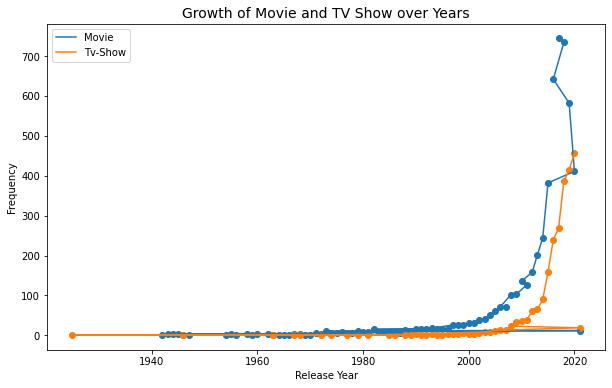

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(movie_data_year_wise["release_year"],movie_data_year_wise["Frequency"])
plt.plot(movie_data_year_wise["release_year"],movie_data_year_wise["Frequency"],label = "Movie")


plt.scatter(tv_show_data_year_wise["release_year"],tv_show_data_year_wise["Frequency"])
plt.plot(tv_show_data_year_wise["release_year"],tv_show_data_year_wise["Frequency"],label = "Tv-Show")

plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Growth of Movie and TV Show over Years', size=14)
plt.legend()
plt.show()

### **Clearly Movie is getting more priority over the years but TV series is not lagged. It's viewers are also increasing simulteniously**

### **Identifying Related  Movies By Matching Texts**

In [ ]:
'''
Identifying Similar Items 
'''


import nltk
from gensim import corpora
from gensim import models
from gensim import similarities


### **Function That will automate the entire process and return dataframe of 10 related movies and their description**

In [ ]:
def similar_movie_list(df,movie_name):
  df.set_index("show_id",inplace = True)
  token_list = [nltk.word_tokenize(token) for token in df['description']]
  dictionary = corpora.Dictionary(token_list)
  bag_of_words = [dictionary.doc2bow(i) for i in token_list]
  tfidf = models.TfidfModel(bag_of_words)
  index = similarities.SparseMatrixSimilarity(tfidf[bag_of_words], num_features=dictionary.num_pos)

  token_value = int(df[df.title.str.find(movie_name) > -1].index[0][1:])

  bow = bag_of_words[token_value - 1]
  bow_tfidf = tfidf[bow]

  similarity_list = index[bow_tfidf]
  sorted_similar = sorted(enumerate(similarity_list), key=lambda x: x[1], reverse=True)
  movie_names  = []
  
  description_list = []
  for document_number, _ in sorted_similar[:10]:
    movie_names.append(netflix_data_all.iloc[document_number].title)
    
    description_list.append(netflix_data_all.iloc[document_number].description)
  frame = pd.DataFrame({"Title":movie_names,"Description": description_list})

  print("Selected Movie ----->",movie_name)
  print("\n")
  print("Related Movie and Descriptions :\n")
  return frame


      

    

  



In [ ]:
similar_movie_list(netflix_data_all,"3 Idiots")

Selected Movie -----> 3 Idiots


Related Movie and Descriptions :



,Title,Description
0,3 Idiots,While attending one of India's premier college...
1,College Romance,"Three best friends look for love, laughs and s..."
2,Pahuna,"Fleeing unrest in their native Nepal, three yo..."
3,Ken Burns: The Roosevelts: An Intimate History,Award-winning documentarian Burns profiles thr...
4,I Dream Of Dance,Experience the joy and sacrifice of one of the...
5,Candy Jar,Dueling high school debate champs who are at o...
6,Engineering Girls,Three engineering students deal with dorm dram...
7,Best Neighbors,A just-married couple moves into their new hom...
8,Singles Villa,In a luxurious condominium complex with dracon...
9,"Waiting for ""Superman""",This dynamic documentary weaves together stori...
